# Physics 5300 Final SP22
# Double Pendulum using Lagrange's equation

Defines a class that is used to generate a plot from solving Lagrange's equations for a double pendulum.

## Equations

$\theta_1$ and $\theta_2$ are the angles of each pendulum. The components of the bobs' positions and velocities are:

$\begin{align}
  {x_1} &= L_1 \sin\theta_1  \\
  {y_1} &= L_1 \cos\theta_1  \\
  {x_2} &= {x_1} + L_2 \sin\theta_2  \\
  {y_2} &= {y_1} + L_2 \cos\theta_2  \\
\end{align}$

$\begin{align}
{\dot{x_1}} &= L_1  \dot\theta_1  \cos\theta_1 \\
{\dot{y_1}} &= - L_1  \dot\theta_1  \sin\theta_1 \\
{\dot{x_2}} &= L_1  \dot\theta_1  \cos\theta_1 + L_2  \dot\theta_2  \cos\theta_2 \\
{\dot{y_2}} &= - L_1  \dot\theta_1  \sin\theta_1 - L_2  \dot\theta_2  \sin\theta_2 \\
\end{align}$

The kinetic and potential energies:

$\begin{align}
T &= \frac{1}{2} m_1 \mathcal{v_1}^2 + \frac{1}{2} m_2 \mathcal{v_2}^2 = \frac{1}{2} m_1 ({\dot{x_1}}^2 + {\dot{y_1}}^2) + \frac{1}{2} m_2 ({\dot{x_2}}^2 + {\dot{y_2}}^2) \\
&= \frac{1}{2} m_1 L_1^2 {\dot\theta_1}^2 + \frac{1}{2} m_2 [L_1^2 {\dot\theta_1}^2 + L_2^2 {\dot\theta_2}^2 + 2 L_1 L_2 \cos(\theta_1 - \theta_2) \dot\theta_1 \dot\theta_2 \\
U &= -m_1 g y_1 - m_2 g y_2 = -(m_1 + m_2)L_1 g \cos\theta_1 - m_2 L_2 g \cos\theta_2
\end{align}$

The Lagrangian is:

$\begin{align}
\mathcal{L} &= T - U \\
&= \frac{1}{2} (m_1 + m_2) l_1^2 \dot\theta_1^2 + \frac{1}{2} m_2 l_2^2 \dot\theta_2^2 + m_2 l_1 l_2 \dot\theta_1 \dot\theta_2 \cos(\theta_1 - \theta_2) + (m_1 + m_2) l_1 g \cos\theta_1 + m_2 g l_2 \cos\theta_2
\end{align}$

The Euler-Lagrange equations:

$\begin{align}
 \frac{d}{dt}(\frac{\partial\mathcal{L}}{\partial \dot{q_i}}) - \frac{\partial\mathcal L}{\partial{q_i}} = 0
 \end{align}$
 
For these coordinates, we get:

$\begin{align}
(m_1 + m_2) L_1 \ddot\theta_1 + m_2 L_2 \ddot\theta_2 \cos(\theta_1 - \theta_2) + m_2 L_2 \dot\theta_2^2 \sin(\theta_1 - \theta_2) + (m_1 + m_2) g \sin\theta_1 = 0. \\
m_2 L_2 \ddot\theta_2 + m_2 L_1 \ddot\theta_1 \cos(\theta_1 - \theta_2) - m_2 L_1 \dot\theta_1^2 \sin(\theta_1 - \theta_2) + m_2 g \sin\theta_2 = 0. \\
\end{align}$

Solving for $\dot{z_1}$ and $\dot{z_2}$ :

$\begin{align}
\dot{z_1} &= \frac{m_2 g \sin\theta_2 \cos(\theta_1 - \theta_2) - m_2 \sin(\theta_1 - \theta_2) [l_1 z_1^2 \cos(\theta_1 - \theta_2) + l_2 z_2^2] - (m_1 + m_2) g \sin\theta_1}{l_1[m_1 + m_2 \sin^2(\theta_1 - \theta_2)]} \\
\dot{z_2} &= \frac{(m_1 + m_2)[l_1 z_1^2 \sin(\theta_1 - \theta_2) - g \sin\theta_2 + g \sin\theta_1 \cos(\theta_1 - \theta_2)] + m_2 l_2 z_2^2 \sin(\theta_1 - \theta_2) \cos(\theta_1 - \theta_2)}{l_2 [m_1 + m_2 \sin^2(\theta_1 - \theta_2)]}
\end{align}$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Double Pendulum Class

In [4]:
class DoublePendulum():
    """
    DoublePendulum class implements the parameters and Lagrange's equations for 
     a simple double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    mn : float
        mass of pendulum bob, where n is the pendulum bob number

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., mass1=1., mass2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = mass1
        self.m2 = mass2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dtheta1/dt dtheta1_dot/dt dtheta2/dt dtheta2_dot/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = theta1 and y[1] = theta1_dot
            y[2] = theta2 and y[3] = theta2_dot
            
        Returns
        -------
        
        """
        theta1, z1, theta2, z2 = y

        c, s = np.cos(theta1-theta2), np.sin(theta1 - theta2)
        denom = (self.m1 + self.m2 * s**2)

        theta1_dot = z1
        z1_dot = (self.m2 * self.g * np.sin(theta2) * c \
                 - self.m2 * s * (self.L1 * z1**2 * c + self.L2 * z2**2) \
                 - (self.m1 + self.m2) * self.g * np.sin(theta1) ) \
                 / self.L1 / denom
        theta2_dot = z2
        z2_dot = ( (self.m1 + self.m2) * (self.L1 * z1**2 * s \
                 - self.g * np.sin(theta2) + self.g * np.sin(theta1) * c)
                 + self.m2 * self.L2 * z2**2 *s * c) \
                 / self.L2 / denom
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y

        return theta1, theta1_dot, theta2, theta2_dot

    def calc_E(y):
        """ Return the total energy of the system."""

        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
                2*L1*L2*th1d*th2d*np.cos(th1-th2))
        return T + V

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make Pendulum Plot

In [7]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
mass1 = 1.
mass2 =1.
g = 1.

# Instantiate a double pendulum 
dp1 = DoublePendulum(L1=L1, L2=L2, mass1=mass1, mass2=mass2, g=g)

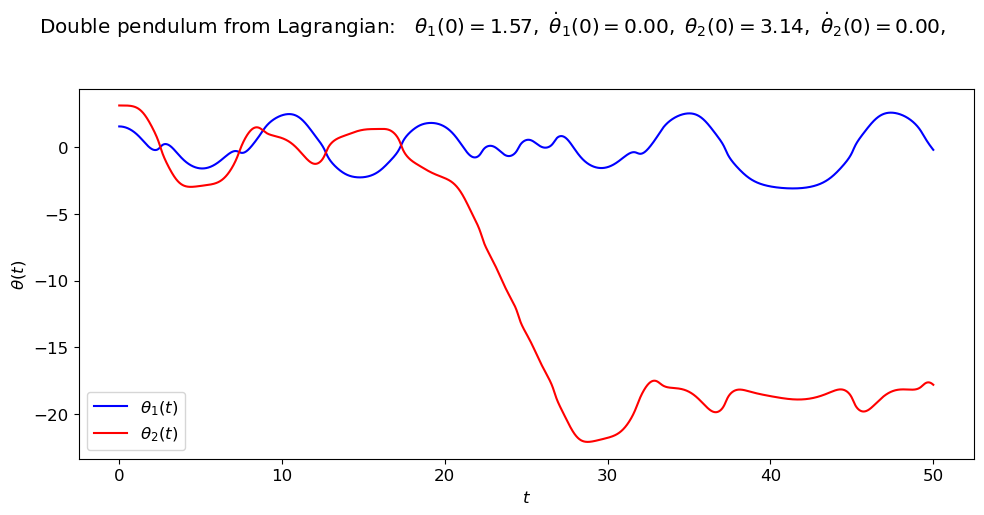

In [8]:
# Initial conditions
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

# start the plot
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$'

fig.suptitle(overall_title, va='baseline')
    
# plot 1
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            ax=ax_a)    
                              
# plot 2     
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            color='red',
            label=r'$\theta_2(t)$',
            ax=ax_a)    


fig.tight_layout()
fig.savefig('Double_pendulum_Lagrange.png', bbox_inches='tight')  

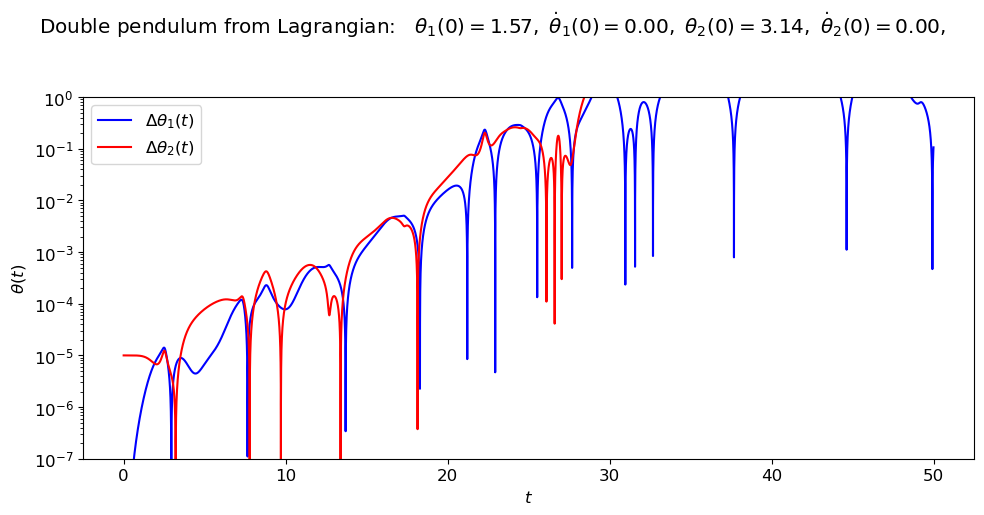

In [9]:
theta1_0 = np.pi / 2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, theta1b_dot, theta2b, theta2b_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.00001, theta2_dot_0)

# start the plot
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$'

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop]-theta1b[start:stop]), 
            axis_labels=theta_vs_time_labels, 
            color='blue', semilogy = True,
            label=r'$\Delta\theta_1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop]-theta2b[start:stop]), 
            axis_labels=theta_vs_time_labels, 
            color='red', semilogy = True,
            label=r'$\Delta\theta_2(t)$', 
            ax=ax_a)

ax_a.set_ylim(1.e-7,1.)

fig.tight_layout()
fig.savefig('Double_pendulum_Lagrange_chaotic.png', bbox_inches='tight')  